# Dirichlet Flow Matching: Visualising the Simplex

## Imports

In [1]:
import jax.numpy as jnp
import jax.random as jr
import jax

import matplotlib.pyplot as plt
import mpltern

In [2]:
import dfm.visualising_flows as viz_flows
import dfm.utils as utils

## Main

### Visualising the Dirichlet Distribution at Different Times

In [3]:
# View source code of flow function
utils.display_source(viz_flows.dirichlet_density)

In [4]:
utils.display_source(viz_flows.is_simplex)

In [59]:
T = 8.0
tlrp, coords = viz_flows.dirichlet_density(T, num_cats=3, bins=100)

In [60]:
on_simplex = viz_flows.is_simplex(coords)
t, l, r, p = jax.tree_map(lambda x: x[on_simplex], tlrp)

### Plot Trajectories and Heatmap

In [61]:
x_1 = jnp.array([0])
x_timeline = viz_flows.sample_x(x_1, 3, T, 0.5, key=jr.PRNGKey(2))

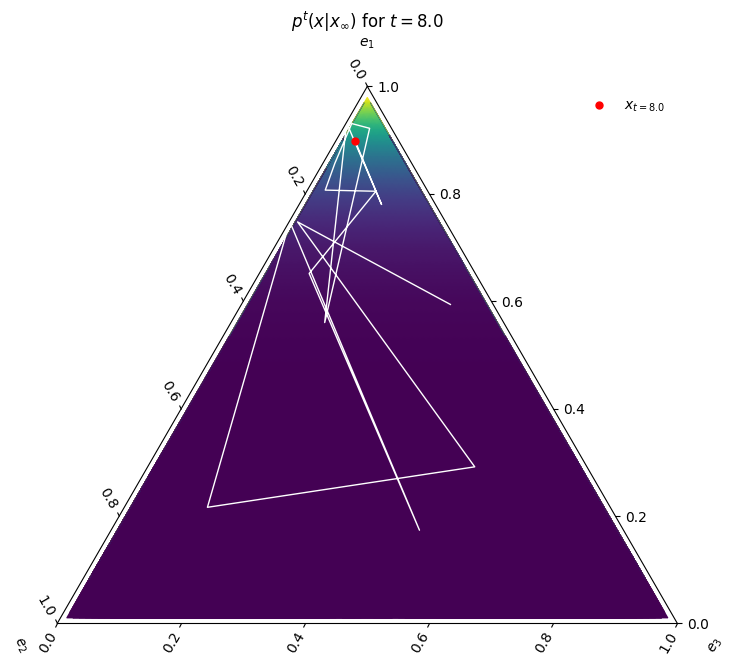

In [69]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="ternary")

ax.tripcolor(t, l, r, p, shading="gouraud", edgecolors="none", vmin=0)

t_x, l_x, r_x = x_timeline[:, 0, 0], x_timeline[:, 0, 1], x_timeline[:, 0, 2]
ax.plot(t_x, l_x, r_x, color="w", linewidth=1.0)

ax.plot(t_x[-1], l_x[-1], r_x[-1], color="r", marker="o", markersize=5, label=r"$x_{" + f"t={T}" + r"}$", linestyle="")

_ = ax.set_tlabel(r"$e_1$")
_ = ax.set_llabel(r"$e_2$")
_ = ax.set_rlabel(r"$e_3$")


ax.set_title(r"$p^t(x | x_\infty)$ for $t=" f"{T}" + r"$")

_ = plt.legend(frameon=False)